# Creando nuestras primeras neuronas

In [2]:
import numpy as np
import tensorflow as tf

/home/eblancoh/anaconda3/envs/universe/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Elegimos una semilla para números aleatorios
np.random.seed(123)
tf.set_random_seed(123)

In [5]:
random_a = np.random.uniform(0, 20, (4, 4))
random_a

array([[13.92938371,  5.7227867 ,  4.53702907, 11.02629538],
       [14.3893794 ,  8.4621292 , 19.61528397, 13.69659477],
       [ 9.61863803,  7.84235036,  6.86356032, 14.58099415],
       [ 8.77144489,  1.19355793,  7.96088511, 14.75990811]])

In [6]:
random_b = np.random.uniform(0,20,(4,1))
random_b

array([[ 3.64983461],
       [ 3.50903512],
       [10.63102748],
       [10.63655174]])

In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [8]:
#tf.add(a,b)
sum_operator = a + b

#tf.multiply(a,b)
mult_operator = a * b 

# Ejecutar sesiones haciendo uso de Feed Dictionaries

In [9]:
with tf.Session() as sess:
    add_result = sess.run(sum_operator, feed_dict={a: random_a, b: random_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_operator, feed_dict={a: random_a, b: random_b})
    print(mult_result)

[[17.579218  9.372622  8.186864 14.67613 ]
 [17.898415 11.971165 23.12432  17.205631]
 [20.249664 18.473377 17.494587 25.21202 ]
 [19.407997 11.83011  18.597437 25.39646 ]]


[[ 50.839947  20.887226  16.559406  40.244156]
 [ 50.492836  29.69391   68.83072   48.061832]
 [102.256004  83.37224   72.9667   155.01096 ]
 [ 93.297935  12.695341  84.67637  156.99452 ]]


# Ejemplo sencillo de Red Neuronal

In [10]:
# Definimos el número de variables y el número de neuronas que tendrá nuestra primera capa
n_features = 10
n_dense_neurons = 5

In [11]:
# Definimos el Placeholder para la variable independiente x
x = tf.placeholder(tf.float32, (None, n_features))

In [12]:
# Definimos las matrices correspondientes a los bias y los pesos W
b = tf.Variable(tf.zeros([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

## Definición de la función de activación

In [13]:
# Definimos el producto de las dos matrices x y W
W_x = tf.matmul(x, W)

In [14]:
# La salida de la capa de neuronas z = W·x + b
z = tf.add(W_x, b)

In [15]:
# tf.nn.relu() or tf.tanh()
activation = tf.sigmoid(z)

In [16]:
init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    sess.run(init)
    # Para obtener la salida a nuestra capa de 5 neuronas, indicamos la función de activación (operación)
    # y le pasamos como variabl un array aletaorio de dimensión [1, n_features]
    layer_out = sess.run(activation, feed_dict={x : np.random.random([1,n_features])})

In [18]:
print(layer_out)

[[0.03293002 0.13216355 0.461144   0.22631334 0.891941  ]]


# Ejemplo de Regresión Lineal con TensorFlow

In [19]:
# Fabricaremos algunas variables independientes aleatorias:
x_data = np.linspace(0,50,50) + np.random.uniform(-0.5,0.5,50)

In [20]:
y_label = np.linspace(0,10,50) + np.random.uniform(-1.5,1.5,50)

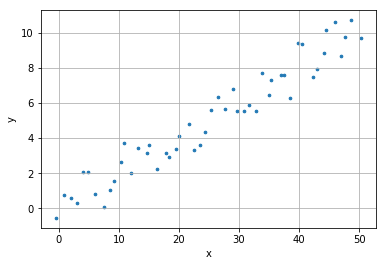

In [21]:
plt.scatter(x_data, y_label, s = 7)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [36]:
# Inicializamos con valores aleatorios como variables la pendiente y la intersección 
# de nuestra recta a ajustar a los datos.
misc = np.random.rand(2)

m = tf.Variable(misc[0], dtype = tf.float32)
b = tf.Variable(misc[1], dtype = tf.float32)

## Definición de una función de coste

In [37]:
# Definimos al inicio un error nulo
error = 0
for x, y in zip(x_data, y_label):
    # Nuestro valor predicho
    y_pred = m * x + b
    # Definimos la función de coste. en este caso hacemos uso de la típica RMS.
    # ¡Necesitaremos una función de optimización para la minimización!

    error += (y - y_pred)**2

In [38]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
# Elegir learning rates muy elevadas puede provocar que la solución posterior diverja.
# Buscamos minimizar el optimizador anterior.
train = optimizer.minimize(error)

In [39]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:

    sess.run(init)
    # Elegimos un número de epochs en el que entrenar nuestra red
    epochs = 100
    for i in range(epochs):
        sess.run(train)
        
    # Los resultados de la pendiente y el punto de intersección se pueden obtener fácilmente
    final_m , final_b = sess.run([m, b])

In [41]:
print(final_m, final_b)

0.17716128 0.83050585


## Evaluación del ajuste

In [42]:
# Elegimos un conjunto de variables independientes de prueba y obtenemos su predicción 
x_test = np.linspace(0, 50, 50)
y_test = final_m * x_test + final_b

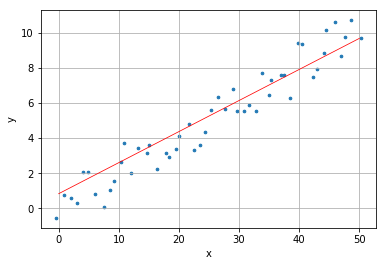

In [43]:
plt.scatter(x_data,y_label, s = 7)
plt.plot(x_test, y_test, 'r', linewidth = .75)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [44]:
# Suma de los cuadrados de los residuos:
SS_res = np.sum((y_label - (final_m * x_data + final_b))**2)
# La suma de los cuadrados totales se define como:
SS_tot = np.sum((y_label - np.mean(y_label))**2)

# El coeficiente r**2 se define como:
r_squared = 1 - SS_res/SS_tot

In [45]:
r_squared

0.9099748909509469